In [200]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import Delaunay
from matplotlib.colors import Normalize

In [233]:
%load_ext autoreload
%autoreload 2
import utils.generators as gs 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
A, B = gs.genrate_matrix(-0.7), gs.genrate_matrix(0.7)
A, B

(array([[ 1. , -0.7],
        [-0.7,  1. ]]),
 array([[1. , 0.7],
        [0.7, 1. ]]))

In [123]:
def distances_two(A,B):
    
    va, vb = gs.upper_vectorization(A), gs.upper_vectorization(B)

    ed_ab = np.round(np.sqrt( (va-vb)**2 ), 2)[0]

    gd_ab = np.round(gs.geodesic_k(A,B), 2)
    
    df = pd.DataFrame({'matrix':['AB'],
                       'euclidean':[ed_ab],
                       'geodesic':[gd_ab],
                      })
                    
    print(A)
    print(df)

    
def distances(A,B,X):
    
    va, vb, vx = gs.upper_vectorization(A), gs.upper_vectorization(B), gs.upper_vectorization(X)
    
    ed_ax = np.round(np.sqrt( (va-vx)**2 ), 2)[0]
    ed_xb = np.round(np.sqrt( (vx-vb)**2 ), 2)[0]
    ed_ab = np.round(np.sqrt( (va-vb)**2 ), 2)[0]
    
    gd_ax = np.round(gs.geodesic_k(A,X), 2)
    gd_xb = np.round(gs.geodesic_k(X,B), 2)
    gd_ab = np.round(gs.geodesic_k(A,B), 2)
    
    df = pd.DataFrame({'matrix':['AX','XB','AB'],
                       'euclidean':[ed_ax,ed_xb,ed_ab],
                       'geodesic':[gd_ax,gd_xb,gd_ab],
                      })
                    
    
    print(df)
    

In [46]:
#size = 
limit = 3

X = np.linspace(0, limit)
Z = np.linspace(0, limit)
X, Z = np.meshgrid(X, Z)

In [47]:
Y1 = np.sqrt(X*Z)
Y2 = -np.sqrt(X*Z)
Y1.shape

(50, 50)

### Surface

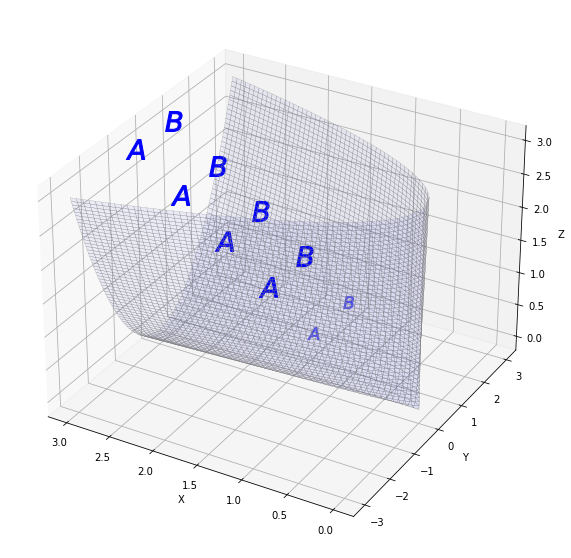

In [101]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X, Y1, Z, linewidth=0.2, antialiased=True, color='blue', edgecolor = 'gray', alpha=0.05)
ax.plot_surface(X, Y2, Z, linewidth=0.2, antialiased=True, color='blue', edgecolor = 'gray', alpha=0.05)
#ax.plot_trisurf(xs, ybs, zs, linewidth=0.2, antialiased=True, color='gray', alpha=0.1)

#ax.scatter(*get_field(I), color='r', marker='$I$', s=200, label=f'I={get_str(I)}')

for s, M in zip(['A','B'],[A,B]):
    ax.scatter(*gs.get_field(M), color='b', marker=f'${s}$', s=150, alpha=0.5)
    for t in np.linspace(0.5, 2, 4):
        ax.scatter(*gs.get_field(M+I*t), color='b', marker=f'${s}$', s=400)

ax.invert_xaxis()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#plt.legend()            
plt.show()

### Wireframe

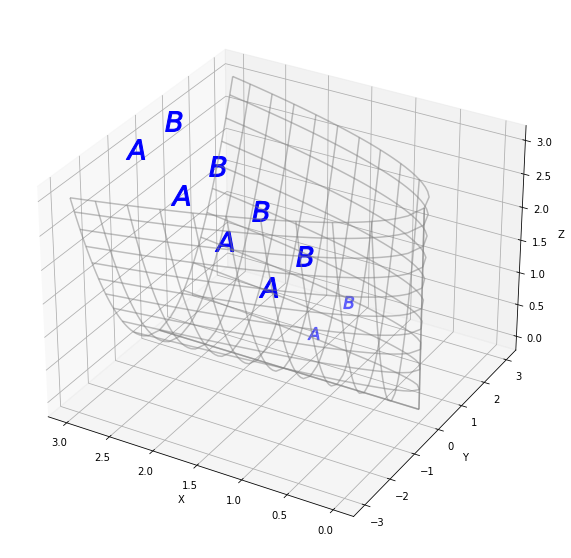

In [60]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.plot_wireframe(X, Y1, Z, rstride=5, cstride=5, color='gray', alpha=0.5)
ax.plot_wireframe(X, Y2, Z, rstride=5, cstride=5, color='gray', alpha=0.5)

#ax.scatter(*get_field(I), color='r', marker='$I$', s=200, label=f'I={get_str(I)}')

for s, M in zip(['A','B'],[A,B]):
    ax.scatter(*gs.get_field(M), color='b', marker=f'${s}$', s=150, alpha=0.5)
    for t in np.linspace(0.5, 2, 4):
        ax.scatter(*gs.get_field(M+I*t), color='b', marker=f'${s}$', s=400)

ax.invert_xaxis()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#plt.legend()            
plt.show()

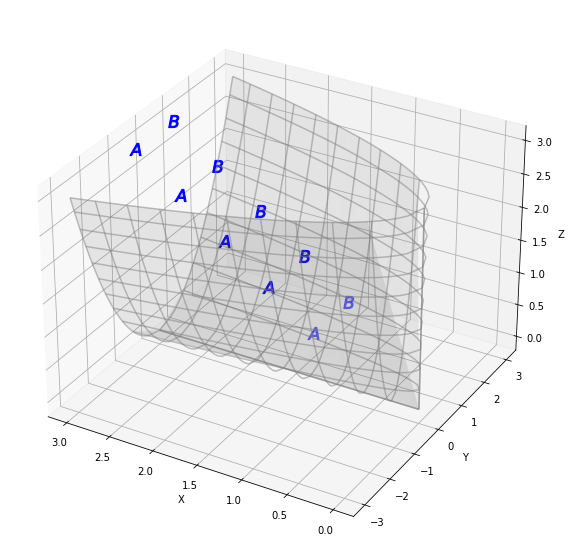

In [64]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.plot_trisurf(xs, yas, zs, linewidth=0.2, antialiased=True, color='gray', alpha=0.1)
ax.plot_trisurf(xs, ybs, zs, linewidth=0.2, antialiased=True, color='gray', alpha=0.1)

ax.plot_wireframe(X, Y1, Z, rstride=5, cstride=5, color='gray', alpha=0.5)
ax.plot_wireframe(X, Y2, Z, rstride=5, cstride=5, color='gray', alpha=0.5)

#ax.scatter(*get_field(I), color='r', marker='$I$', s=200, label=f'I={get_str(I)}')

for s, M in zip(['A','B'],[A,B]):
    ax.scatter(*gs.get_field(M), color='b', marker=f'${s}$', s=150, alpha=0.5)
    for t in np.linspace(0.5, 2, 4):
        ax.scatter(*gs.get_field(M+I*t), color='b', marker=f'${s}$', s=150)

ax.invert_xaxis()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#plt.legend()            
plt.show()

### Trisurf

In [230]:
size = 5
limit = 3
x = np.linspace(0, limit, size)
z = np.linspace(0, limit, size)

xs = []
zs = []
yas = []
ybs = []
for i in x:
    for j in z:
        a = np.sqrt(i*j)
        b = -1*np.sqrt(i*j)
        if j==3:
            print(i,a,j)
        
        xs.append(i)
        zs.append(j)
        yas.append(a)
        ybs.append(b)
len(xs),len(yas),len(ybs),len(zs)

0.0 0.0 3.0
0.75 1.5 3.0
1.5 2.1213203435596424 3.0
2.25 2.598076211353316 3.0
3.0 3.0 3.0


(25, 25, 25, 25)

In [231]:
triangles =  [
((0.75,-1.5,3), (0.75,-1.3,2.25), (0,0,3)),
((0.75,-1.3,2.25), (0.75,-1.0606,1.5), (0,0,3)),
((0.75,-1.0606,1.5), (0,0,2.25), (0,0,3)),
    
]

0.0
0.75
1.5
2.25
3.0


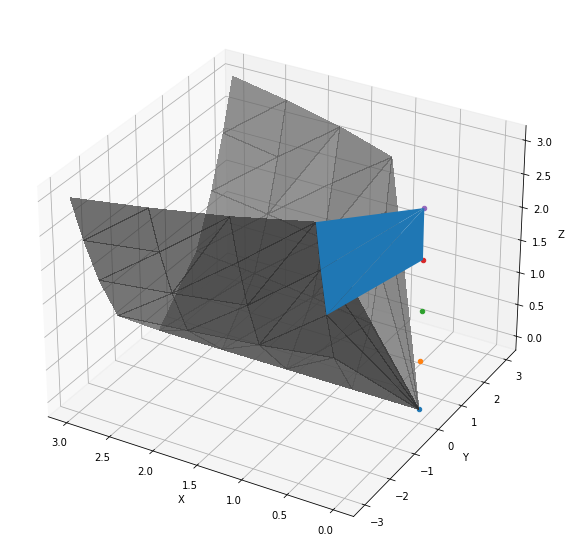

In [232]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.plot_trisurf(xs+[0], yas+[0], zs+[3], linewidth=0.2, antialiased=False, color='gray', alpha=0.7)
ax.plot_trisurf(xs, ybs, zs, linewidth=0.2, antialiased=False, color='gray', alpha=0.7)

ax.add_collection(Poly3DCollection(triangles))

for zi in np.linspace(0,3, 5):
    print(zi)
    ax.scatter(0,0,zi)

ax.invert_xaxis()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#plt.legend()            
plt.show()

### Using Delaunay

In [224]:
points = np.array([xs,
          yas,
          zs]).T

In [225]:
tri = Delaunay(np.array([xs,
          ybs,
          zs]).T)

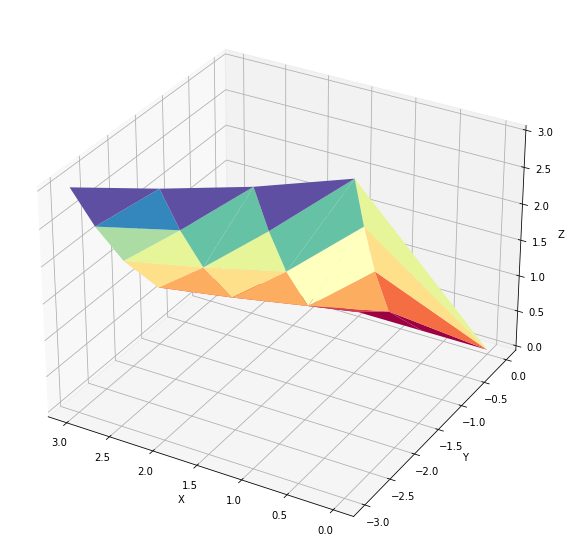

In [226]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')


ax.plot_trisurf(xs, ybs, zs, triangles=tri.simplices, cmap=plt.cm.Spectral)


ax.invert_xaxis()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#plt.legend()            
plt.show()